In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D, Convolution1D
from keras.models import Model, Sequential
from keras import initializers, regularizers, constraints, optimizers, layers

In [4]:
df = pd.read_csv('C:/Users/Ayush shukla/Downloads/flipkart.csv')

In [4]:
df.head(10)

,marketplace,customer_id,review_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41099022,R59VGL4HIPFDP,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,1,N,Y,One Star,garbage,31-08-2015
1,US,15744366,R3GR0Z9Z4Z1295,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,N,Doesn't work as advertised,"Didn't work as advertised, there was no sound ...",31-08-2015
2,US,46165193,R8R09HXXQHIWN,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,Y,One Star,Setup way to complicated for the average user.,30-08-2015
3,US,31009192,R19JT1LFVNATBG,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,5,0,0,N,N,We love the camera but had a lot of difficulty...,We purchased a Foscam about 6 months ago. We l...,30-08-2015
4,US,52865176,R2SCARC7V2J64P,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,2,0,0,N,N,Saved Grandma but camera died after 2 yrs,Worked for 2 yrs as a 'granny cam' and saved h...,29-08-2015
5,US,3282316,R10WZ8I85SRCMK,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,Y,get what you pay for,"I bought this with reading all these reviews,I...",28-08-2015
6,US,14005127,RN51K25SFP9LC,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,Y,Completely and totally unreliable,It's basically impossible to make this camera/...,27-08-2015
7,US,37183268,R2TE5F2DGA9Q2T,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,3,0,0,N,Y,Three Stars,AC Adapter died after 1 year,27-08-2015
8,US,48954925,R2J7XTAUP2H3XZ,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,5,0,1,N,N,"I'm not very camera smart, but this was the ea...","Thank you John, for being so helpful in settin...",26-08-2015
9,US,14455954,R2P8V1C2RGDMSB,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,4,0,0,N,Y,Four Stars,works well,26-08-2015


# EDA

In [7]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_title',
       'product_category', 'star_rating', 'helpful_votes', 'total_votes',
       'vine', 'verified_purchase', 'review_headline', 'review_body',
       'review_date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4652 entries, 0 to 4651
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        4652 non-null   object
 1   customer_id        4652 non-null   int64 
 2   review_id          4652 non-null   object
 3   product_title      4652 non-null   object
 4   product_category   4652 non-null   object
 5   star_rating        4652 non-null   int64 
 6   helpful_votes      4652 non-null   int64 
 7   total_votes        4652 non-null   int64 
 8   vine               4652 non-null   object
 9   verified_purchase  4652 non-null   object
 10  review_headline    4652 non-null   object
 11  review_body        4652 non-null   object
 12  review_date        4652 non-null   object
dtypes: int64(4), object(9)
memory usage: 472.6+ KB


In [9]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [11]:
# Checking unique values in all features
l=['marketplace','product_category','verified_purchase','vine','helpful_votes', 'total_votes']

for i in l:
  print('The unique element in : ', i)
  print('-'*30)
  print(df[i].unique())
  print()

The unique element in :  marketplace
------------------------------
['US']

The unique element in :  product_category
------------------------------
['Camera']

The unique element in :  verified_purchase
------------------------------
['Y' 'N']

The unique element in :  vine
------------------------------
['N']

The unique element in :  helpful_votes
------------------------------
[   0    1   11    2    6    8    5    4    3   17    7   13   15    9
   19   10   12   25   16 2131   46   45   28   29   14  136   54   93
   72  153  210   37 2071   77  114   35   50  119  132   34   20   87
   53   43   18]

The unique element in :  total_votes
------------------------------
[   1    0    2    3   13    8    9    4    5    6   18   16    7   15
   19   10   11   32   20 2269   57   22   12   61   23   35   36   14
   17  169   64  115   96   21  186  257   40 2198   91  143   38   60
  151  162   24  103   69   25   30]



In [12]:
# Frequency of values of different types in all features
l=['product_category','verified_purchase','vine','helpful_votes', 'total_votes']

for i in l:
  print('The unique element in : ', i)
  print('-'*30)
  print(df[i].value_counts())
  print()

The unique element in :  product_category
------------------------------
Camera    4652
Name: product_category, dtype: int64

The unique element in :  verified_purchase
------------------------------
Y    3534
N    1118
Name: verified_purchase, dtype: int64

The unique element in :  vine
------------------------------
N    4652
Name: vine, dtype: int64

The unique element in :  helpful_votes
------------------------------
0       3508
1        740
2        196
3         63
4         26
6         18
8         15
5         15
7         11
9          6
15         6
12         3
10         3
28         3
11         3
13         3
16         2
50         2
19         2
17         2
53         1
87         1
20         1
2071       1
34         1
132        1
119        1
43         1
35         1
114        1
77         1
153        1
37         1
210        1
72         1
93         1
54         1
136        1
14         1
29         1
45         1
46         1
2131       1
25         1
18

The count plot of  :  product_category
------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


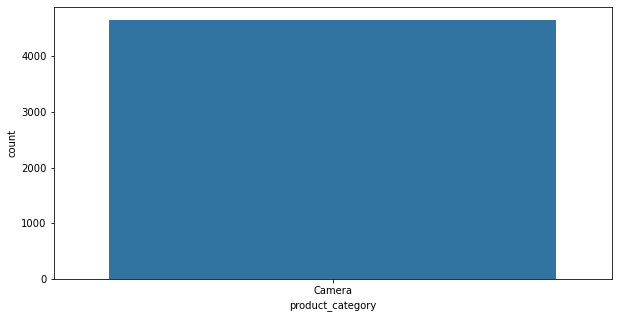


The count plot of  :  verified_purchase
------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


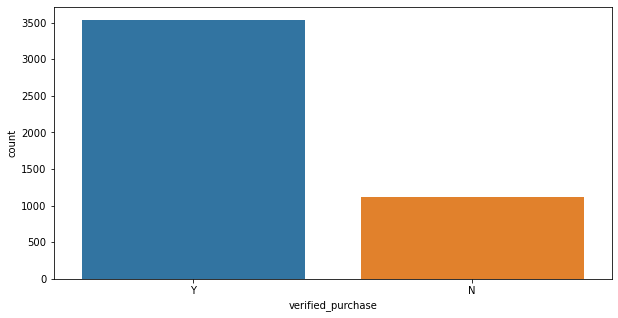


The count plot of  :  vine
------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


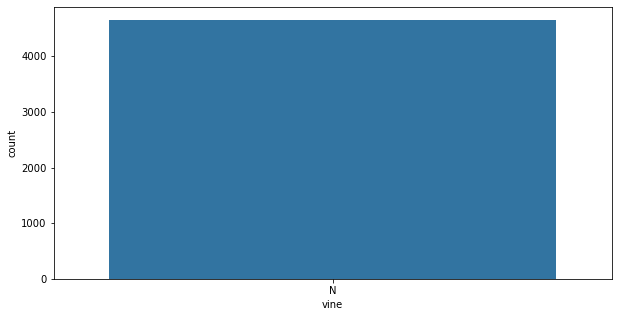


The count plot of  :  helpful_votes
------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


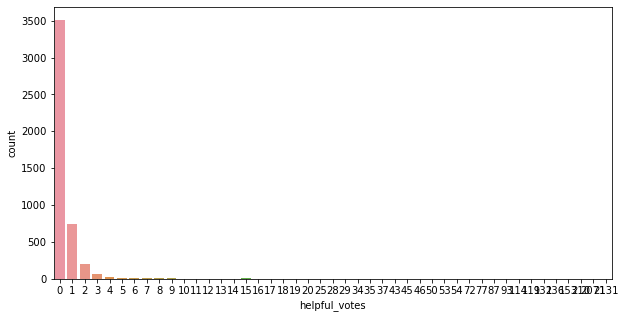


The count plot of  :  total_votes
------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


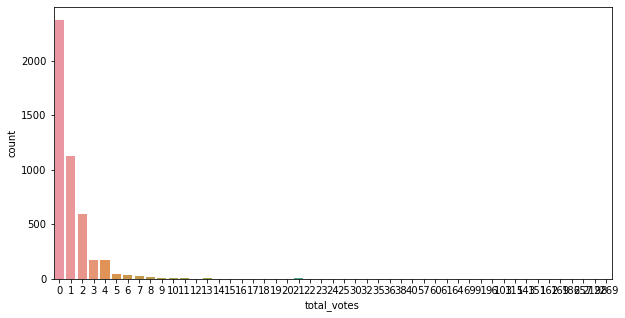

In [13]:
# Plots to give visuals about frequency of values of all types in different features
features = ['product_category','verified_purchase','vine','helpful_votes','total_votes']
for i in features:
  print('The count plot of  : ', i)
  print('-'*30)
  plt.figure(figsize=(10,5))
  sns.countplot(df[i])
  plt.show()
  print()

In [14]:
# Value count of every rating type
df.star_rating.value_counts()

5    2570
4     937
1     556
3     314
2     275
Name: star_rating, dtype: int64

<AxesSubplot:xlabel='star_rating', ylabel='count'>

<Figure size 432x288 with 0 Axes>

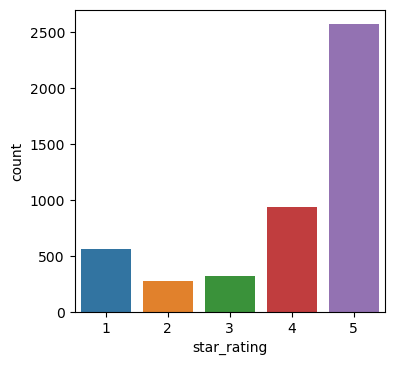

In [15]:
# Visualizing the value count of every rating type
plt.figure()
plt.figure(figsize=(4,4),dpi=100)
sns.countplot(x='star_rating',data=df)

In [16]:
# Percentage of every rating w.r.t all other ratings
print('-' * 20 + "Percentage ratings" + '-' * 20)
star_ratings = df['star_rating'].value_counts() / len(df) * 100
star_ratings

--------------------Percentage ratings--------------------


5    55.245056
4    20.141874
1    11.951849
3     6.749785
2     5.911436
Name: star_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Rating')

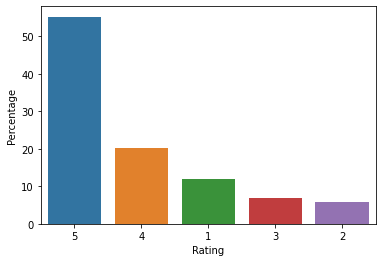

In [17]:
# Visualization of percentage of every rarting type
plt.figure()
sns.barplot(star_ratings.index, star_ratings.values, order=star_ratings.index)
plt.ylabel("Percentage")
plt.xlabel('Rating')

In [18]:
df = df[df['star_rating'] != 3]

In [19]:
df['rating'] = df['star_rating'].apply(lambda x: 1 if x >= 4 else 0)
df['rating'].value_counts()

1    3507
0     831
Name: rating, dtype: int64

Text(0.5, 0, 'Rating')

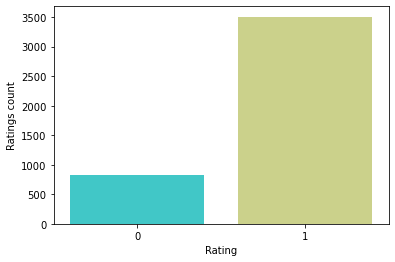

In [20]:
# Value count of positive and negative classes
plt.figure()
sns.countplot(x = 'rating', data = df, palette='rainbow')
plt.ylabel("Ratings count")
plt.xlabel("Rating")

In [21]:
df['reviews'] = df['review_body'] + " " + df['review_headline']
df.head(10)

,marketplace,customer_id,review_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,rating,reviews
0,US,41099022,R59VGL4HIPFDP,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,1,N,Y,One Star,garbage,31-08-2015,0,garbage One Star
1,US,15744366,R3GR0Z9Z4Z1295,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,N,Doesn't work as advertised,"Didn't work as advertised, there was no sound ...",31-08-2015,0,"Didn't work as advertised, there was no sound ..."
2,US,46165193,R8R09HXXQHIWN,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,Y,One Star,Setup way to complicated for the average user.,30-08-2015,0,Setup way to complicated for the average user....
3,US,31009192,R19JT1LFVNATBG,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,5,0,0,N,N,We love the camera but had a lot of difficulty...,We purchased a Foscam about 6 months ago. We l...,30-08-2015,1,We purchased a Foscam about 6 months ago. We l...
4,US,52865176,R2SCARC7V2J64P,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,2,0,0,N,N,Saved Grandma but camera died after 2 yrs,Worked for 2 yrs as a 'granny cam' and saved h...,29-08-2015,0,Worked for 2 yrs as a 'granny cam' and saved h...
5,US,3282316,R10WZ8I85SRCMK,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,Y,get what you pay for,"I bought this with reading all these reviews,I...",28-08-2015,0,"I bought this with reading all these reviews,I..."
6,US,14005127,RN51K25SFP9LC,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,Y,Completely and totally unreliable,It's basically impossible to make this camera/...,27-08-2015,0,It's basically impossible to make this camera/...
8,US,48954925,R2J7XTAUP2H3XZ,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,5,0,1,N,N,"I'm not very camera smart, but this was the ea...","Thank you John, for being so helpful in settin...",26-08-2015,1,"Thank you John, for being so helpful in settin..."
9,US,14455954,R2P8V1C2RGDMSB,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,4,0,0,N,Y,Four Stars,works well,26-08-2015,1,works well Four Stars
10,US,28399081,R3ESO8PQNRXIEK,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,Y,Wakes your kids up at night with loud clicking...,"Video is ok, set up is rather easy although no...",26-08-2015,0,"Video is ok, set up is rather easy although no..."


In [22]:
df_new = df[['rating','reviews']]
df_new.head(10)

,rating,reviews
0,0,garbage One Star
1,0,"Didn't work as advertised, there was no sound ..."
2,0,Setup way to complicated for the average user....
3,1,We purchased a Foscam about 6 months ago. We l...
4,0,Worked for 2 yrs as a 'granny cam' and saved h...
5,0,"I bought this with reading all these reviews,I..."
6,0,It's basically impossible to make this camera/...
8,1,"Thank you John, for being so helpful in settin..."
9,1,works well Four Stars
10,0,"Video is ok, set up is rather easy although no..."


In [23]:
# Initializing WordNet and stopwords on nlp model
lemmitizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

df_new['reviews'] = df_new['reviews'].apply(lambda sentence: sentence.lower())
df_new.head(10)

[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     shukla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ayush
[nltk_data]     shukla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\AYUSHS~1\AppData\Local\Temp/ipykernel_12748/299126684.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['reviews'] = df_new['reviews'].apply(lambda sentence: sentence.lower())


,rating,reviews
0,0,garbage one star
1,0,"didn't work as advertised, there was no sound ..."
2,0,setup way to complicated for the average user....
3,1,we purchased a foscam about 6 months ago. we l...
4,0,worked for 2 yrs as a 'granny cam' and saved h...
5,0,"i bought this with reading all these reviews,i..."
6,0,it's basically impossible to make this camera/...
8,1,"thank you john, for being so helpful in settin..."
9,1,works well four stars
10,0,"video is ok, set up is rather easy although no..."


In [24]:
# Compiling emoji patterns using regular expressions
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

In [25]:
# Replacing the decontracted words with their original form
def decontracting_words(sentence):
    # specific
    sentence = re.sub(r"won\'t", "will not", sentence)
    sentence = re.sub(r"can\'t", "can not", sentence)

    # general
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    return sentence

In [26]:
# Removing HTML, XML, emoticons and decontracting words
stopwrds = stopwords.words('english')
def remove_html_urls_emoticons(sentence):
    # Remove HTML, XML tags from data 
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    # Remove URLs from the data 
    sentence = re.sub("http\S+", "", sentence)
    # Decontract words
    sentence = decontracting_words(sentence)
    # Removing emoticons
    sentence = emoji_pattern.sub(' ', sentence)
    return sentence

In [27]:
# Removing words with digits in them and punctuations
def remove_numeric_punctuations_stopwords(sentence):
    # Remove words with numbers in them from the data
    sentence = re.sub(r"\S*\d\S*", "", sentence)
    # remove punctuations, numbers
    sentence = re.sub(r"[^A-Za-z]", ' ', sentence)
    # Remove stopwords
    sentence = " ".join([word for word in sentence.split() if word not in stopwrds])
    return sentence

In [28]:
df_new['reviews'] = df_new['reviews'].apply(remove_html_urls_emoticons)
df_new['reviews'] = df_new['reviews'].apply(remove_numeric_punctuations_stopwords)

C:\Users\AYUSHS~1\AppData\Local\Temp/ipykernel_12748/1198475408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['reviews'] = df_new['reviews'].apply(remove_html_urls_emoticons)
C:\Users\AYUSHS~1\AppData\Local\Temp/ipykernel_12748/1198475408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['reviews'] = df_new['reviews'].apply(remove_numeric_punctuations_stopwords)


In [29]:
# Lemmatizing the words
df_new['reviews'] = df_new['reviews'].apply(lambda x: " ".join([lemmitizer.lemmatize(token) for token in x.split()]))

C:\Users\AYUSHS~1\AppData\Local\Temp/ipykernel_12748/1577154449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['reviews'] = df_new['reviews'].apply(lambda x: " ".join([lemmitizer.lemmatize(token) for token in x.split()]))


In [30]:
# Maing word cloud of most popular words
from wordcloud import WordCloud

for i in range (0,2):
  print('When star Rating is : ', i)
  print('-' * 50)
  print()
  text = df_new[df_new['rating'] == i]
  all_words = ' '.join([text for text in text.reviews])
  wordcloud = WordCloud(width= 1500, height= 800,
                              max_font_size = 170,
                              collocations = False).generate(all_words)
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

ModuleNotFoundError: No module named 'wordcloud'

When star Rating is :  0
______________________________



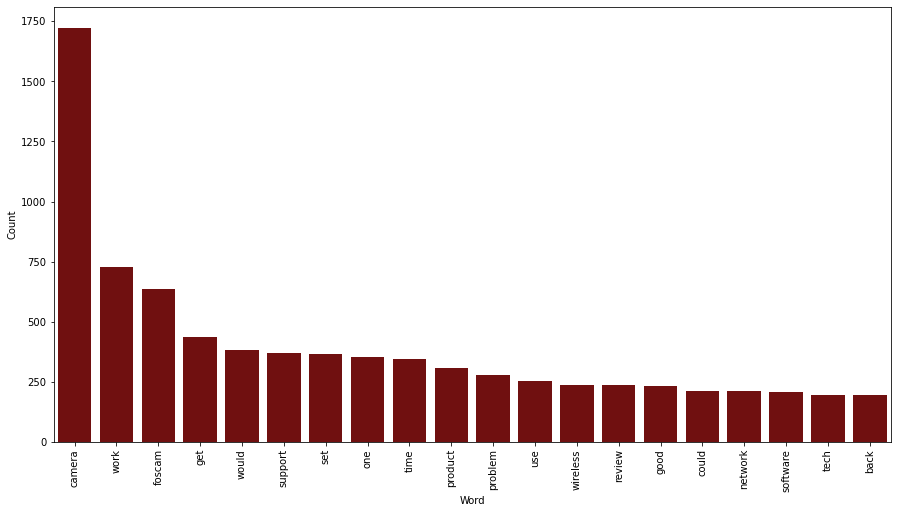


When star Rating is :  1
______________________________



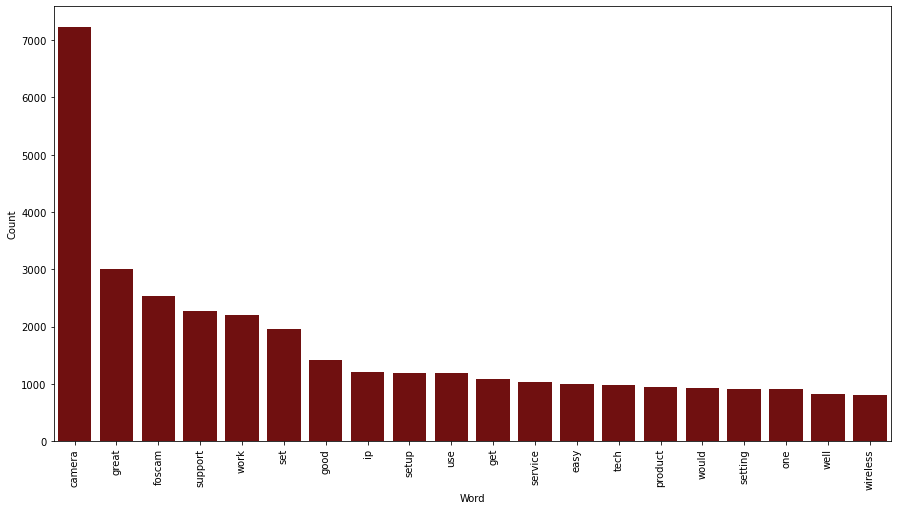

In [31]:
# Tokenizing the words and visually representing the frequency of most popular words used
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    data_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    data_frequency = data_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(15,8))
    ax = sns.barplot(data = data_frequency, x = "Word", y = "Frequency", color = 'maroon')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()


for i in range(0,2):
  print('When star Rating is : ', i)
  print('_'*30)
  print()
  counter(df_new[df_new['rating'] == i], 'reviews', 20)
  print()

## Modelling phase


### without countVectorizer

In [32]:
X = df_new['reviews']
Y = df_new['rating']

In [33]:
# Splitting data into train test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [34]:
print(x_train.shape)
print('-' * 50)
print(x_test.shape)
print('-' * 50)
print(y_train.shape)
print('-' * 50)
print(y_test.shape)
print('-' * 50)

(3470,)
--------------------------------------------------
(868,)
--------------------------------------------------
(3470,)
--------------------------------------------------
(868,)
--------------------------------------------------


In [35]:
# Tokenizing the words using Tokenizer
# Using the most popular 8000 words from the dataset
# Encoding the words in sentences with their key from Tokenizers and padding the encodings with small lengths than 140
# Max character length in sentence is set to 140
top_words = 8000
tokenizer = Tokenizer(num_words = top_words, oov_token="#OOV")
tokenizer.fit_on_texts(x_train)
list_tokenized_train = tokenizer.texts_to_sequences(x_train)

max_review_length = 140
X_train = pad_sequences(list_tokenized_train, maxlen = max_review_length)
Y_train = y_train

In [36]:
# Encoding the text to sequences using tokenizer to prepare data for neural network
test_word_list = tokenizer.texts_to_sequences(x_test)
X_test = pad_sequences(test_word_list, maxlen = max_review_length)
Y_test = y_test

## Modelling using CountVectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=8000, ngram_range=(2,2))
x_stem = cv.fit_transform(X).toarray()
x_stem

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_stem, Y, test_size = 0.2, random_state = 42)

## Logistic regression

In [41]:
lr = LogisticRegression(max_iter=5000)
lr.fit(x_train, y_train)

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [42]:
print("Train set Accuracy: ",lr.score(x_train, y_train))
print("Test set Accuracy: ", lr.score(x_test, y_test))
print("Train set f1-score: ",f1_score(lr.predict(x_train), y_train))
print("Test set f1-score: ", f1_score(lr.predict(x_test), y_test))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train)

Train set Accuracy:  0.9927953890489913
Test set Accuracy:  0.8963133640552995
Train set f1-score:  0.9955428775182742
Test set f1-score:  0.9394347240915208


array([[ 653,   25],
       [   0, 2792]], dtype=int64)

## Random Forest Classifier

In [42]:
rfc = RandomForestClassifier(n_estimators = 60)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60)

In [43]:
print("Train set Accuracy: ",rfc.score(x_train, y_train))
print("Test set Accuracy: ", rfc.score(x_test, y_test))
print("Train set f1-score: ",f1_score(rfc.predict(x_train), y_train))
print("Test set f1-score: ", f1_score(rfc.predict(x_test), y_test))

Train set Accuracy:  0.9985590778097982
Test set Accuracy:  0.868663594470046
Train set f1-score:  0.9991053855788156
Test set f1-score:  0.921917808219178


## Gaussian Naive Bayes

In [43]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [44]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

In [45]:
print("Train set Accuracy: ",accuracy_score(y_pred=y_pred_train, y_true=y_train))
print("Test set Accuracy: ", accuracy_score(y_pred=y_pred_test, y_true=y_test))
print("Train set f1-score: ",f1_score(gnb.predict(x_train), y_train))
print("Test set f1-score: ", f1_score(gnb.predict(x_test), y_test))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train)

Train set Accuracy:  0.9654178674351584
Test set Accuracy:  0.8283410138248848
Train set f1-score:  0.9780380673499268
Test set f1-score:  0.8999328408327737


array([[ 678,    0],
       [ 120, 2672]], dtype=int64)

### Deep Learning Model

In [47]:
model = Sequential()
model.add(Embedding(top_words+1, 32, input_length=max_review_length))
model.add(LSTM(200))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 32)           256032    
                                                                 
 lstm (LSTM)                 (None, 200)               186400    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 442,633
Trainable params: 442,633
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train, Y_train, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20
347/347 [==============================] - 62s 158ms/step - loss: 0.3420 - accuracy: 0.8588 - val_loss: 0.2226 - val_accuracy: 0.9135
Epoch 2/20
347/347 [==============================] - 50s 145ms/step - loss: 0.1381 - accuracy: 0.9485 - val_loss: 0.1817 - val_accuracy: 0.9251
Epoch 3/20
347/347 [==============================] - 51s 146ms/step - loss: 0.0599 - accuracy: 0.9823 - val_loss: 0.1759 - val_accuracy: 0.9395
Epoch 4/20
347/347 [==============================] - 52s 149ms/step - loss: 0.0339 - accuracy: 0.9903 - val_loss: 0.2573 - val_accuracy: 0.9337
Epoch 5/20
347/347 [==============================] - 53s 151ms/step - loss: 0.0150 - accuracy: 0.9971 - val_loss: 0.2339 - val_accuracy: 0.9265
Epoch 6/20
347/347 [==============================] - 51s 146ms/step - loss: 0.0076 - accuracy: 0.9993 - val_loss: 0.2997 - val_accuracy: 0.9308
Epoch 7/20
347/347 [==============================] - 53s 152ms/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.3038 - val_ac

In [49]:
 y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [50]:
y_pred_train = (y_pred_train > 0.5)
y_pred_test = (y_pred_test > 0.5)

In [51]:
print("Train set Accuracy: ",accuracy_score(y_pred=y_pred_train, y_true=y_train))
print("Test set Accuracy: ", accuracy_score(y_pred=y_pred_test, y_true=y_test))
print("Train set f1-score: ",f1_score(y_pred_train, y_train))
print("Test set f1-score: ", f1_score(y_pred_test, y_test))

Train set Accuracy:  0.9855907780979827
Test set Accuracy:  0.923963133640553
Train set f1-score:  0.9910458452722063
Test set f1-score:  0.953781512605042


In [52]:
from textblob import TextBlob

In [53]:
df_new.columns

Index(['rating', 'reviews'], dtype='object')

C:\Users\AYUSHS~1\AppData\Local\Temp/ipykernel_12428/3815487575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['reviews']= df_new['reviews'].astype(str) # Make sure about the correct data type
C:\Users\AYUSHS~1\AppData\Local\Temp/ipykernel_12428/3815487575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['polarity'] = df_new['reviews'].apply(pol)


Text(0.5, 1.0, 'Histogram of Polarity Score')

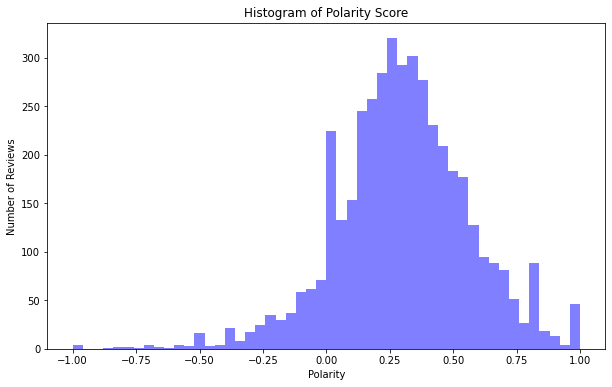

In [54]:
df_new['reviews']= df_new['reviews'].astype(str) # Make sure about the correct data type
pol = lambda x: TextBlob(x).sentiment.polarity
df_new['polarity'] = df_new['reviews'].apply(pol) 
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_new.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')